### Analyze info from RSEs based on `dcm_rucio_rses.py`

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [6]:
df = pd.read_json('RSEs_dune.json')

In [7]:
df

,name,type,total,usage,free,nfiles,date
0,RAL_ANTARES,TAPE,500000.0,8.500000e-08,5.000000e+05,3,"""2023-08-16"""
1,T3_US_NERSC,DISK,20000.0,1.061474e+00,1.999894e+04,14,"""2023-03-09"""
2,DUNE_IN_TIFR,DISK,100.0,2.045327e+00,9.795467e+01,6,"""2023-08-16"""
3,DUNE_FR_CCIN2P3_TAPE,DISK,500000.0,8.525075e+03,4.914749e+05,12486,"""2023-06-16"""
4,FNAL_DCACHE_PERSISTENT,DISK,100.0,3.831525e-02,9.996168e+01,6,"""2023-04-20"""
5,RAL-PP,DISK,400000.0,9.135517e+04,3.086448e+05,65272,"""2023-06-16"""
6,DUNE_UK_LANCASTER_CEPH,TAPE,500000.0,4.850818e+05,1.491824e+04,198228,"""2023-04-21"""
7,MANCHESTER,DISK,1000000.0,9.682002e+05,3.179983e+04,381587,"""2023-02-28"""
8,DUNE_IT_INFN_CNAF,DISK,300000.0,1.230000e-07,3.000000e+05,5,"""2023-04-13"""
9,NIKHEF,DISK,1000000.0,4.006979e+05,5.993021e+05,187513,"""2023-12-28"""


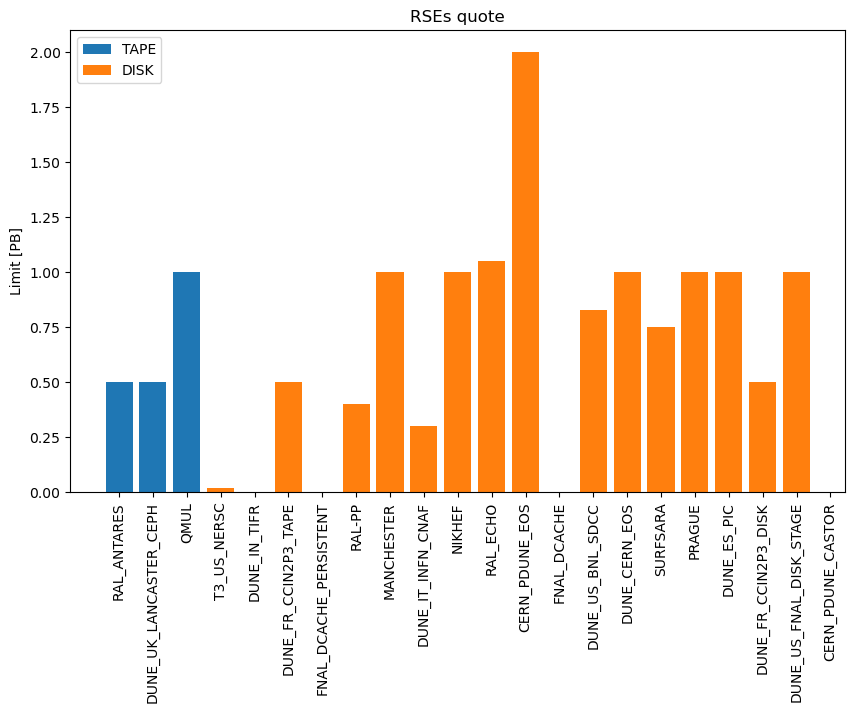

In [8]:
# Group the data by site and plot limit 

plt.figure(figsize=(10, 6))
for rse_type in df['type'].unique():
    subset = df[df['type'] == rse_type]
    plt.bar(subset['name'], subset['total']/1e6, label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Limit [PB]')
plt.title('RSEs quote')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('rse_fig1.png', bbox_inches='tight')
plt.show()

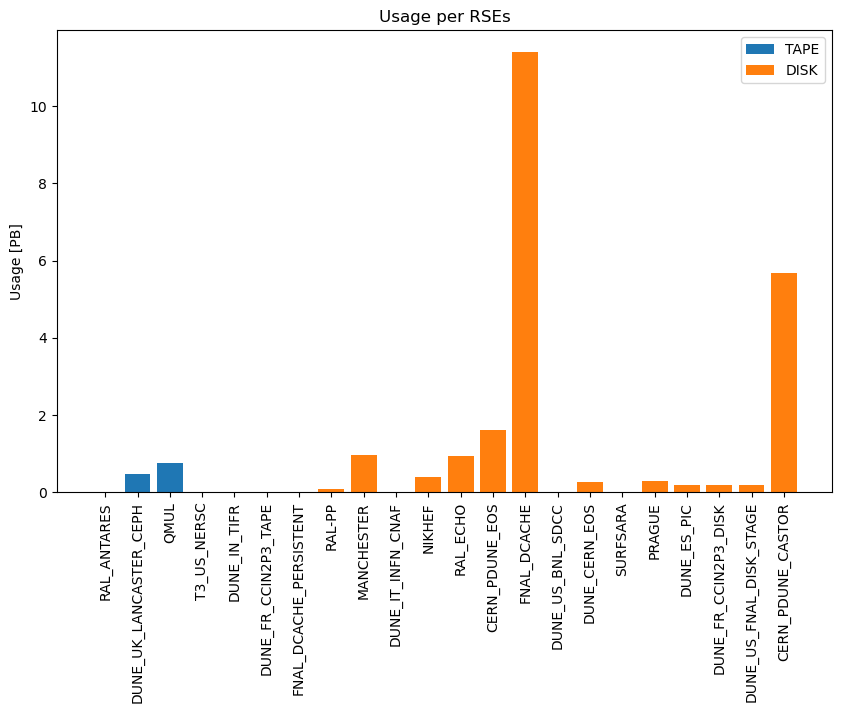

In [9]:
# Group the data by site and plot usage 

plt.figure(figsize=(10, 6))
for rse_type in df['type'].unique():
    subset = df[df['type'] == rse_type]
    plt.bar(subset['name'], subset['usage']/1e6, label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Usage [PB]')
plt.title('Usage per RSEs')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('rse_fig2.png', bbox_inches='tight')
plt.show()

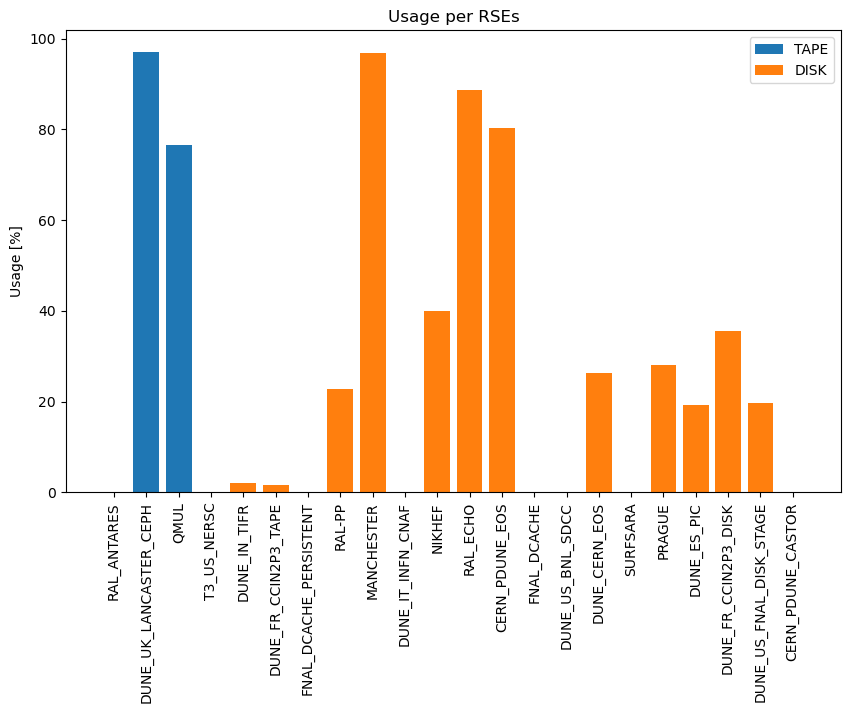

In [10]:
# Group the data by site and plot percentage usage 

plt.figure(figsize=(10, 6))
for rse_type in df['type'].unique():
    subset = df[df['type'] == rse_type]
    plt.bar(subset['name'], (subset['usage']/subset['total'])*100, label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Usage [%]')
plt.title('Usage per RSEs')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('rse_fig3.png', bbox_inches='tight')
plt.show()

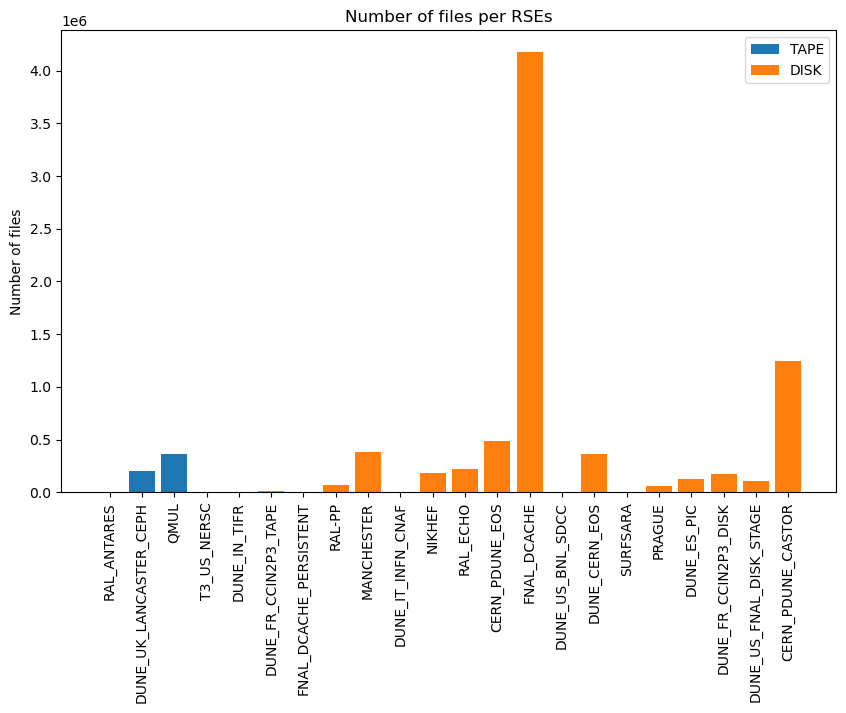

In [7]:
# Group the data by site and plot number of files  

plt.figure(figsize=(10, 6))
for rse_type in df['type'].unique():
    subset = df[df['type'] == rse_type]
    plt.bar(subset['name'], subset['nfiles'], label=rse_type)

#plt.xlabel('RSE Name')
plt.ylabel('Number of files')
plt.title('Number of files per RSEs')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('rse_fig4.png', bbox_inches='tight')
plt.show()

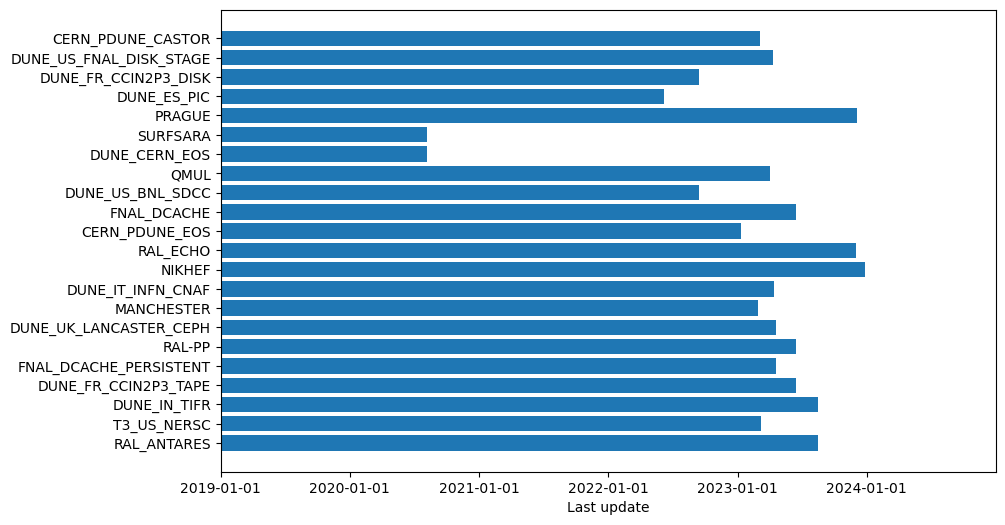

In [8]:
# Group the data by site and plot last time was updated

fig, ax = plt.subplots(figsize=(10, 6))
df['date'] = pd.to_datetime(df['date'].str.strip('"'), format='%Y-%m-%d')
ax.barh(df['name'], df['date'])
start_date = datetime(2019, 1, 1)
end_date = datetime(2024, 12, 31)
ax.set_xlim([start_date, end_date])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xlabel('Last update')
plt.savefig('rse_fig5.png', bbox_inches='tight')
plt.show()
